# Air Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\New folder\Python Object and Data Structure Basics\csv file\All Files\AirQualityPrediction.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data.shape

(29531, 16)

In [4]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [5]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [6]:
data.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [7]:
data['PM2.5'].isnull().sum()

4598

In [8]:
data['PM2.5'].mean()

67.45057794890272

In [9]:
data['PM2.5'].fillna('67', inplace=True)#fill all the null value with mean

In [10]:
data['PM2.5'].isnull().sum()

0

In [11]:
data['PM10'].isnull().sum()

11140

In [12]:
data['PM10'].mean()

118.12710293078102

In [13]:
data['PM10'].fillna('118',inplace=True)

In [14]:
data['PM10'].isnull().sum()

0

In [15]:
data['NO'].isnull().sum()

3582

In [16]:
data['NO'].mean()

17.574729662029284

In [17]:
data['NO'].fillna('17', inplace= True)

In [18]:
data['NO2'].isnull().sum()

3585

In [19]:
data['NO2'].mean()

28.560659061126763

In [20]:
data['NO2'].fillna('28', inplace=True)

In [21]:
data['NO2'].isnull().sum()

0

In [22]:
data['CO'].isnull().sum()

2059

In [23]:
data['CO'].mean()

2.248598209085598

In [24]:
data['CO'].fillna('2', inplace=True)

In [25]:
data['SO2'].isnull().sum()

3854

In [26]:
data['SO2'].mean()

14.531977255910002

In [27]:
data['SO2'].fillna('14', inplace=True)

In [28]:
data['O3'].isnull().sum()

4022

In [29]:
data['O3'].mean()

34.49143047551808

In [30]:
data['O3'].replace('O3', '34', inplace= True)

In [31]:
data['AQI'].isnull().sum()

4681

In [32]:
data['AQI'].mean()

166.4635814889336

In [33]:
data['AQI'].fillna('166', inplace=True)

In [34]:
data.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [35]:
#drop unwanted columns
df = data.drop(['City', 'Date', 'NOx', 'NH3', 'Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'], axis= 1)
df.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0.92,18.22,0.92,27.64,133.36,166
1,67,118,0.97,15.69,0.97,24.55,34.06,166
2,67,118,17.40,19.30,17.40,29.07,30.70,166
3,67,118,1.70,18.48,1.70,18.59,36.08,166
4,67,118,22.10,21.42,22.10,39.33,39.31,166


In [36]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   29531 non-null  object 
 1   PM10    29531 non-null  object 
 2   NO      29531 non-null  object 
 3   NO2     29531 non-null  object 
 4   CO      29531 non-null  object 
 5   SO2     29531 non-null  object 
 6   O3      25509 non-null  float64
 7   AQI     29531 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.8+ MB


In [44]:
print(df.describe())

print(df.columns)

print(df.head())

                 O3
count  25509.000000
mean      34.491430
std       21.694928
min        0.010000
25%       18.860000
50%       30.840000
75%       45.570000
max      257.730000
Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')
  PM2.5 PM10     NO    NO2     CO    SO2      O3  AQI
0    67  118   0.92  18.22   0.92  27.64  133.36  166
1    67  118   0.97  15.69   0.97  24.55   34.06  166
2    67  118  17.40  19.30  17.40  29.07   30.70  166
3    67  118   1.70  18.48   1.70  18.59   36.08  166
4    67  118  22.10  21.42  22.10  39.33   39.31  166


In [47]:
df

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0.92,18.22,0.92,27.64,133.36,166
1,67,118,0.97,15.69,0.97,24.55,34.06,166
2,67,118,17.40,19.30,17.40,29.07,30.70,166
3,67,118,1.70,18.48,1.70,18.59,36.08,166
4,67,118,22.10,21.42,22.10,39.33,39.31,166
...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,0.47,8.55,23.30,41.0
29527,24.38,74.09,3.42,26.06,0.52,12.72,30.14,70.0
29528,22.91,65.73,3.45,29.53,0.48,8.42,30.96,68.0
29529,16.64,49.97,4.05,29.26,0.52,9.84,28.30,54.0


In [50]:
df.isnull().sum()

PM2.5       0
PM10        0
NO          0
NO2         0
CO          0
SO2         0
O3       4022
AQI         0
dtype: int64

In [51]:
df['O3'].mean()

34.49143047551808

In [52]:
df['O3'].fillna('34', inplace= True)

In [53]:
df.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [54]:
#converting data into the Integer datatype to avoid error
prepared_data = df.astype(int)
prepared_data.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


In [55]:
prepared_data.tail()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
29526,15,50,7,25,0,8,23,41
29527,24,74,3,26,0,12,30,70
29528,22,65,3,29,0,8,30,68
29529,16,49,4,29,0,9,28,54
29530,15,66,0,26,0,2,17,50


In [56]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   29531 non-null  int32
 1   PM10    29531 non-null  int32
 2   NO      29531 non-null  int32
 3   NO2     29531 non-null  int32
 4   CO      29531 non-null  int32
 5   SO2     29531 non-null  int32
 6   O3      29531 non-null  int32
 7   AQI     29531 non-null  int32
dtypes: int32(8)
memory usage: 923.0 KB


In [58]:
prepared_data.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.961667,117.771460,17.061698,28.059226,1.805052,14.029765,33.995259,166.390099
std,59.415477,71.502782,21.365891,22.944183,6.710749,16.910682,20.161619,129.064459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,32.000000,79.000000,6.000000,12.000000,0.000000,6.000000,20.000000,88.000000
50%,58.000000,118.000000,11.000000,25.000000,0.000000,10.000000,34.000000,138.000000
75%,72.000000,118.000000,17.000000,34.000000,1.000000,14.000000,42.000000,179.000000
max,949.000000,1000.000000,390.000000,362.000000,175.000000,193.000000,257.000000,2049.000000


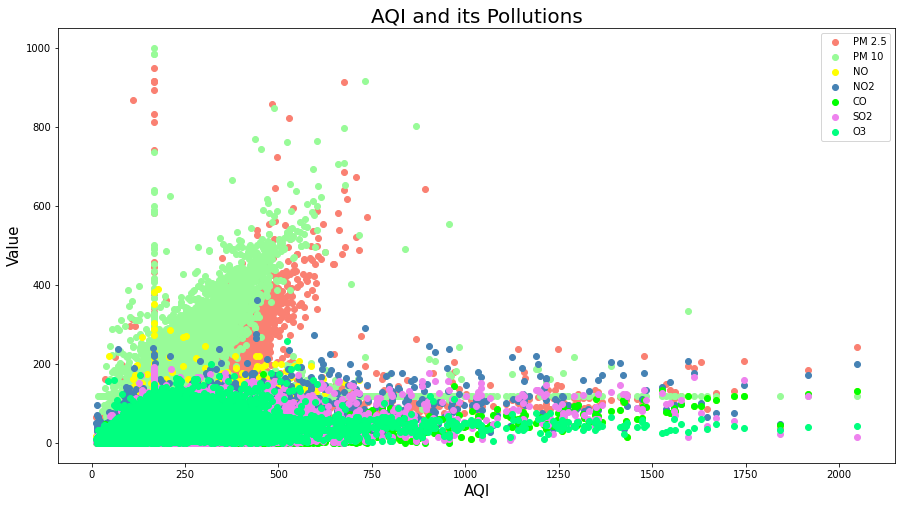

In [61]:
#Scatter Plot
x  = prepared_data['AQI']
y1 = prepared_data['PM2.5']
y2 = prepared_data['PM10']
y3 = prepared_data['NO']
y4 = prepared_data['NO2']
y5 = prepared_data['CO']
y6 = prepared_data['SO2']
y7 = prepared_data['O3']

plt.figure(figsize=(15,8))
plt.scatter(x,y1, label= 'PM 2.5', color = 'salmon')
plt.scatter(x, y2, label= 'PM 10', color = 'palegreen')
plt.scatter(x, y3, label = 'NO', color = 'yellow')
plt.scatter(x, y4, label = 'NO2', color = 'steelblue')
plt.scatter(x, y5, label = 'CO', color = 'lime')
plt.scatter(x, y6, label = 'SO2', color = 'violet')
plt.scatter(x, y7, label = 'O3', color = 'springgreen')
plt.title('AQI and its Pollutions', fontsize= 20)
plt.xlabel('AQI', fontsize= 15)
plt.ylabel('Value', fontsize= 15)
plt.legend()
plt.show()


<AxesSubplot:>

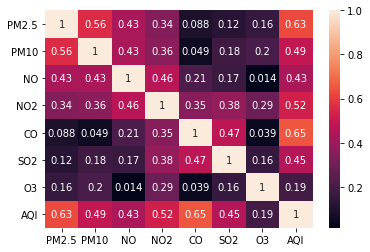

In [62]:
corr = prepared_data.corr()
sns.heatmap(corr, annot= True)#heatmap with correlation

# Data Training

In [64]:
from sklearn.model_selection import train_test_split
x = prepared_data[['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3']]
y = prepared_data['AQI']

In [65]:
print(x.shape)
print(y.shape)

(29531, 7)
(29531,)


In [66]:
#split the data into Train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [68]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23624, 7)
(5907, 7)
(23624,)
(5907,)


# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [70]:
reg1.fit(x_train, y_train)#fit the data

LinearRegression()

In [71]:
pred1 = reg1.predict(x_test)# make prediction

In [72]:
pred1

array([371.87979128,  68.77445783, 215.11906865, ...,  84.31237887,
       123.44313232, 135.33653498])

In [74]:
print("Accuracy of the Linear Regression Model comes to be \n")
print(reg1.score(x_train, y_train))

Accuracy of the Linear Regression Model comes to be 

0.7916136318658895


# Lasso Regression

In [75]:
from sklearn.linear_model import Lasso
reg2 = Lasso()

In [76]:
reg2.fit(x_train, y_train)#fitting data

Lasso()

In [77]:
pred2 = reg2.predict(x_test)

In [78]:
pred2

array([371.72347889,  68.74278843, 215.00195874, ...,  84.31109583,
       123.41302476, 135.40993813])

In [79]:
print("Accuracy of the LassoRegression model comes to be \n")
print(reg2.score(x_train, y_train))

Accuracy of the LassoRegression model comes to be 

0.7916120490893003


# Ridge Regression

In [80]:
#model importing
from sklearn.linear_model import Ridge
reg3 = Ridge()

In [81]:
reg3.fit(x_train, y_train)

Ridge()

In [82]:
pred3 = reg3.predict(x_test)

In [83]:
pred3

array([371.87982624,  68.77448721, 215.1190919 , ...,  84.31237679,
       123.44310316, 135.33655176])

In [84]:
print("Accuracy of the Ridge Regression model come to be : \n")
print(reg3.score(x_train, y_train))

Accuracy of the Ridge Regression model come to be : 

0.7916136318655387


# Decision Tree Regressor

In [85]:
#importing model
from sklearn.tree import DecisionTreeRegressor
reg4 = DecisionTreeRegressor()

In [86]:
reg4.fit(x_train, y_train)

DecisionTreeRegressor()

In [87]:
pred4 = reg4.predict(x_test)

In [88]:
pred4

array([438.,  78., 301., ...,  70., 112.,  23.])

In [89]:
print("Accuracy of the Decision Tree Regressor model comes to be : \n")
print(reg4.score(x_train, y_train))

Accuracy of the Decision Tree Regressor model comes to be : 

0.9991774836088756


# Performance Evoluation

In [90]:
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model")
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format( np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train, y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format( np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train, y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t (:.4f)""".format( np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(x_train, y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format( np.sqrt(mean_squared_error(y_test, pred4)), reg4.score(x_train, y_train)))


Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 59.4859 	 		 0.7916
Lasso Regression 		 59.4948 	 		 0.7916
Ridge Regression 		 59.4859 	 		 (:.4f)
Decision Tree Regressor		 61.2330 	 		 0.9992


## Conclusion: Accuracy of Regression models- Linear regression, lasso regression and rigde regression is almost same.

Whereas accuracy of decision tree regressor is higher and root mean sqaure error is least.

Decision tree regressor is more efficient model.

# END